**Import Packages**


In [200]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import numpy as np
import random

**Parameters**


In [201]:
population_size = 10
num_generations = 100
num_qubits = 5
mutation_rate = 0.01

**Init Quantum Population**


In [202]:
population = []
# Create the initial population
for _ in range(population_size):
    # Create a quantum circuit acting on the q register
    individual = QuantumCircuit(num_qubits, num_qubits)
    individual.h(range(num_qubits))
    population.append(individual)

**Select Parents**


In [203]:
def select_parents(population, fitness_scores):
    # Calculate the probability of each individual being selected
    fitness_probs = (
        np.ones(len(fitness_scores)) / len(fitness_scores)
        if np.sum(fitness_scores) == 0
        else fitness_scores / np.sum(fitness_scores)
    )
    
    parents = []
    # Select two parents
    for _ in range(len(population) // 2):
        # Select first parent
        rand_num = random.random()
        # Find the first parent
        cumulative_prob = 0
        # Loop through the fitness probabilities
        for idx, prob in enumerate(fitness_probs):
            # Add the probability to the running sum
            cumulative_prob += prob
            # Check if the running sum exceeds the random number
            if cumulative_prob >= rand_num:
                parents.append(population[idx])
                break
    return parents

**Crossover**


In [204]:
def crossover(parents, population_size, num_qubits):
    offspring = []
    for _ in range(population_size - len(parents)):
        # Select two parents at random
        parent1, parent2 = random.choice(parents), random.choice(parents)
        child = QuantumCircuit(num_qubits, num_qubits)

        # Apply CNOT gates for the selected control and target qubits from parent1 and parent2
        control_qubits = random.sample(range(num_qubits), num_qubits // 2)
        target_qubits = [q for q in range(num_qubits) if q not in control_qubits]

        # Apply CNOT gates for crossover using parent1 and parent2
        for control, target in zip(control_qubits, target_qubits):
            child.cx(parent1.qubits[control], parent2.qubits[target])

        offspring.append(child)
    return offspring

**Mutation**


In [205]:
def mutate(offspring, mutation_rate, num_qubits):
    for individual in offspring:
        if random.random() < mutation_rate:
            # Flip the qubit
            qubit_to_flip = random.randint(0, num_qubits - 1)
            individual.x(qubit_to_flip)
    return offspring

**Quantum Evaluation**


In [206]:
def evaluate(individual):
    # Here, copy of individual is created to avoid modifying the original circuit
    qc = individual.copy()
    qc.measure(range(num_qubits), range(num_qubits))
    simulator = Aer.get_backend("qasm_simulator")
    job = assemble(transpile(qc, simulator))
    result = simulator.run(job).result()
    counts = result.get_counts(qc)
    # Return the number of '1's as fitness value
    return counts.get("1", 0)

**Genetic Quantum Algorithm**


In [207]:
# Can be modified to run on a while loop until the fitness value is reached
for _ in range(num_generations):
    # Evaluate the fitness of each individual in the population
    fitness_scores = np.array([evaluate(individual) for individual in population])
    # Select the parents
    parents = select_parents(population, fitness_scores)
    # Generate the offspring
    offspring = crossover(parents, population_size, num_qubits)
    # Mutate the offspring
    offspring = mutate(offspring, mutation_rate, num_qubits)
    # Add the parents to the offspring
    population = parents + offspring

/tmp/ipykernel_12316/324878854.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(job).result()


**Get Best Individual Per Generation**

In [208]:
best_individual = max(population, key=evaluate)

/tmp/ipykernel_12316/324878854.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(job).result()


**Visualize Results**


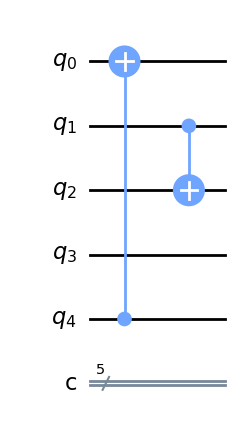

In [209]:
# Draw the circuit
best_individual.draw(output="mpl")

In [210]:
# Evaluate the best individual
print(evaluate(best_individual))

0


/tmp/ipykernel_12316/324878854.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(job).result()


**Measure Best Individual**

In [211]:
best_individual.measure(range(num_qubits), range(num_qubits))

**Running**

In [212]:
backend = Aer.get_backend("qasm_simulator")
transpiled_circuit = transpile(best_individual, backend)
assembled_circuit = assemble(transpiled_circuit, shots=1024)
result = backend.run(assembled_circuit).result()
counts = result.get_counts(best_individual)

/tmp/ipykernel_12316/3724784198.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(assembled_circuit).result()


**Visualize Results**

In [213]:
# Count the number of times each result appears
counts

{'00000': 1024}

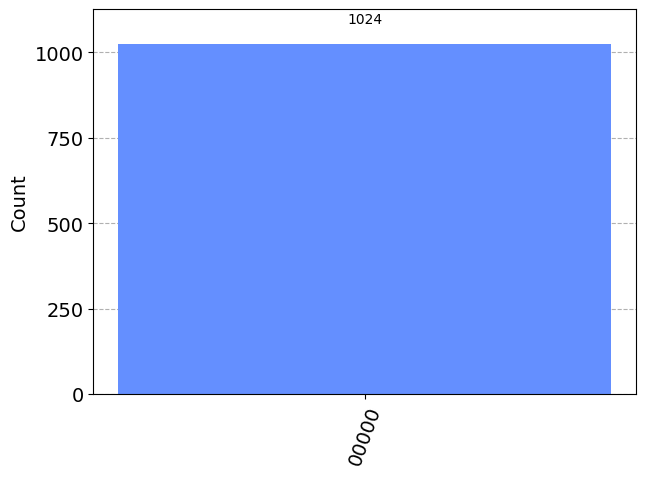

In [214]:
plot_histogram(counts)
